# Portfolio optimization
We  consider a portfolio of stocks and find the best portfoio in that sense that it maximizes the Sharpe Ratio. 


### Importing needed libraries.

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
# matplotlib inline

## Getting stock data
I have chosen five stocks from Nasdaq Helsinki for this portfolio. The stocks are
* Neste Oyj 
* Sampo Oyj
* Sanoma Corporation
* Kemira Oyj
* Nokia Corporation

The stock data I take from Yahoo and I look the stocks adjusted closing prices, because the interest in portfolio optimization lies on returns from stocks not on actual price data. 

In [3]:
tickers = ['NESTE.HE', 'SAMPO.HE', 'SAA1V.HE', 'KEMIRA.HE', 'NOKIA.HE']

In [4]:
stocks = pd.DataFrame()

for t in tickers:
    stocks[t] = web.DataReader(t, data_source='yahoo', start = '2010-1-1')['Adj Close']
    
stocks.columns = ['Neste', 'Sampo', 'Sanoma', 'Kemira', 'Nokia']
stocks.tail()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2020-08-31,44.810001,33.730000,10.86,11.58,4.0725
2020-09-01,45.099998,33.889999,10.74,11.61,3.9890
2020-09-02,46.320000,33.730000,10.84,11.59,3.9960
2020-09-03,45.439999,33.689999,10.86,11.40,3.8075
2020-09-04,44.959999,33.610001,10.68,11.05,3.7645


In [5]:
stocks.info() # checking data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2681 entries, 2010-01-04 to 2020-09-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Neste   2681 non-null   float64
 1   Sampo   2681 non-null   float64
 2   Sanoma  2681 non-null   float64
 3   Kemira  2681 non-null   float64
 4   Nokia   2681 non-null   float64
dtypes: float64(5)
memory usage: 125.7 KB


#### Let's plot normalized prices of these stocks so we can see how they have perfomed compared to each other.

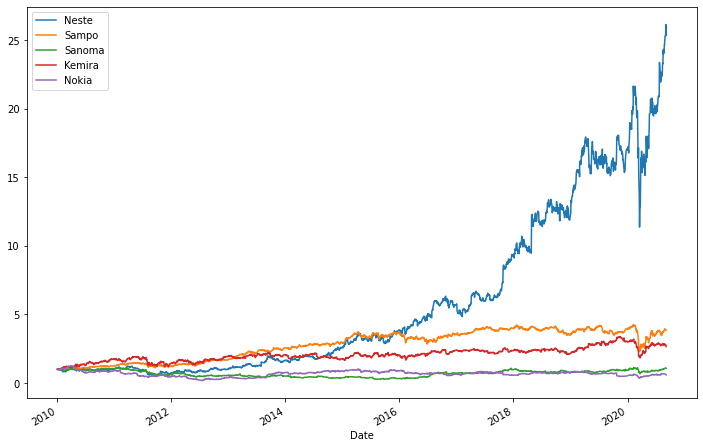

In [5]:
normalized_stocks = stocks/stocks.iloc[0]
normalized_stocks.plot(figsize =(12,8));

## Daily returns
First we calculate simple daily returns. Simple daily returns are calculated with the formula
$$r_t = \frac{p_{t}}{p_{t-1}}-1,$$
where $r_t$ is daily return at day $t$, $p_t$ is adjusted close at day $t$ and $p_{t-1}$ is adjusted close at day $t-1$.

We use these simple returns for calculating the returns. Other choice would be log returns, but since $log(x)$ is very close to $x-1$ when $x$ is close to one, they would yield results that are so close to the simple returns that in this project it doesn't have any real effect.

In [6]:
simple_daily_returns = stocks/stocks.shift(1) - 1

simple_daily_returns.head()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.011811,-0.001752,0.002448,0.002830,-0.003776
2010-01-07,0.016342,0.023364,0.003663,0.006585,0.005956
2010-01-08,0.017612,0.015983,-0.006691,0.022431,-0.004306
2010-01-11,-0.007524,-0.014044,-0.002449,-0.018282,-0.015135


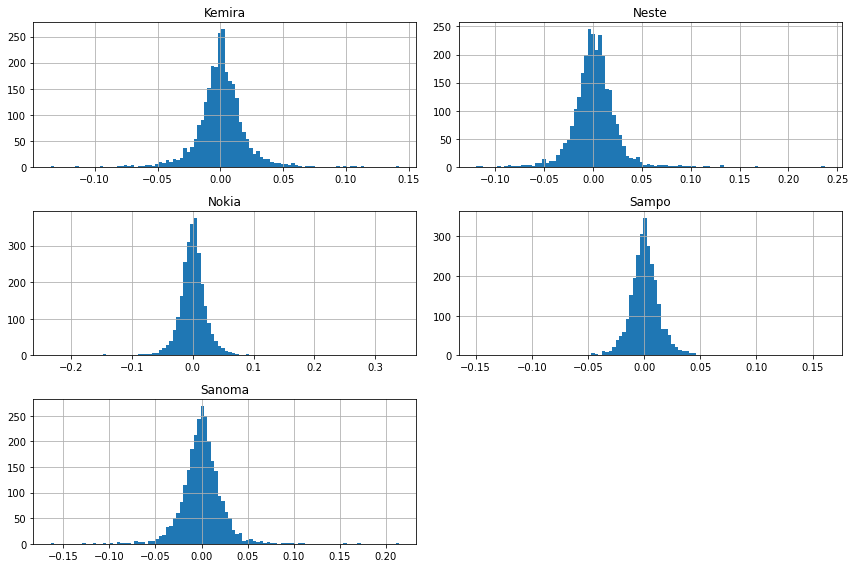

In [12]:
simple_daily_returns.hist(bins=100, figsize = (12,8))
plt.tight_layout();

In [16]:
simple_daily_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Neste,2679.0,0.001461,0.022456,-0.119686,-0.009569,0.000917,0.011993,0.236915
Sampo,2679.0,0.000616,0.014893,-0.149569,-0.006726,0.000549,0.007709,0.160653
Sanoma,2679.0,0.000279,0.022179,-0.163517,-0.010778,0.000000,0.011265,0.214222
Kemira,2679.0,0.000555,0.018921,-0.134982,-0.008321,0.000581,0.009880,0.142236
Nokia,2679.0,0.000140,0.025594,-0.233468,-0.011340,0.000510,0.011352,0.339406


#### Let's make briefly comparison to log returns.

In [17]:
log_returns = np.log(stocks/stocks.shift(1))

In [18]:
log_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Neste,2679.0,0.001211,0.022270,-0.127476,-0.009615,0.000916,0.011921,0.212620
Sampo,2679.0,0.000505,0.014891,-0.162012,-0.006748,0.000549,0.007679,0.148983
Sanoma,2679.0,0.000034,0.022143,-0.178549,-0.010837,0.000000,0.011202,0.194103
Kemira,2679.0,0.000376,0.018914,-0.145005,-0.008356,0.000580,0.009831,0.132988
Nokia,2679.0,-0.000190,0.025728,-0.265878,-0.011405,0.000510,0.011288,0.292226


Log returns yield smaller means due to the fact that since the maxs are smaller and mins are smaller (it like shifts the returns). I really would use simple returns for these stocks because I think they would yield to more realistic results especially since we count together the whole portfolios return and not just look how a single stock performs by itself.

## Making portfolio
We use Sharpe ratio to compare between portfolios. Sharpe ratio is calculated with the formula
$$
SR = \frac{R_p -R_f}{\sigma_p}, 
$$
where $SR$ stands for Sharpe Ratio, $R_p$ is portfolios return, $R_f$ is risk free return and $\sigma_p$ is the standard diviation of protfolios return and it is also called the volatility of the portfolio. A portfolio that has a bigger Sharpe Ratio is considered being better.


In [22]:
simple_daily_returns.corr()

,Neste,Sampo,Sanoma,Kemira,Nokia
Neste,1.000000,0.440352,0.289341,0.428313,0.273591
Sampo,0.440352,1.000000,0.371894,0.509269,0.386416
Sanoma,0.289341,0.371894,1.000000,0.376549,0.262748
Kemira,0.428313,0.509269,0.376549,1.000000,0.315725
Nokia,0.273591,0.386416,0.262748,0.315725,1.000000


Correlation between the returns of chosen stocks are moderate so that they are in that sense a good pick for the sake of the diversification of the portfolio.

### Evenly weighted portfolio

First let's make evenly weighted portfolio and see how it performs i.e.
* Neste Oyj  20 % 
* Sampo Oyj  20 %
* Sanoma Corporation  20 %
* Kemira Oyj  20 %
* Nokia Corporation  20 %

In [24]:
weights = np.array([.2,.2,.2,.2,.2])

##### Annual return, volatility and Sharpe ratio

In [29]:
# Here we approximate annual values from daily mean values multipling with 250, amount of business days in a year.
ret_p = np.sum(simple_daily_returns.mean()* weights)*250 
vol_p = (np.dot(weights.T,np.dot((simple_daily_returns.cov()*250),weights)))**0.5 # We use standard deviation as volatility.
sr = ret_p/vol_p  # Right now the interest rates are at zero so we use 0 as risk free return.

print("Evenly weighted portfolio:")
print(f"  Annual return: {round(ret_p*100,2)} %")
print(f"  Annual volatility: {round(vol_p*100,2)} %")
print(f"  Sharpe ratio: {round(sr,4)}")

Evenly weighted portfolio:
  Annual return: 15.26 %
  Annual volatility: 22.89 %
  Sharpe ratio: 0.6665


Since volatility for this portfolio is greater than return it is not so good portfolio.

Here is good to remember that we do calculations from values from past so that is how in average the evenly weighted portfolio performed in last 10 years period. The past doesn't necessary mean that the future would go same way.

## Optimization of portfolio
#### Monte Carlo simulation
First we use Monte Carlo simulation to look for a optimal portfolio. With Monte Carlo simulation we can randomly test thousands of possible weights for our stocks to find a best one.

In [7]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(stocks.columns)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind] = weights

    # Expected Return based on historical performance
    ret_arr[ind] = np.sum((simple_daily_returns.mean() * weights) *250)

    # Expected standard deviation based on historical data
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(simple_daily_returns.cov() * 250, weights)))

# Sharpe Ratio
sharpe_arr = ret_arr/vol_arr

In [8]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

In [9]:
print("Best portfolio with Monte Carlo simulation:")
print(f"  Annual return: {round(max_sr_ret*100,2)} %")
print(f"  Annual volatility: {round(max_sr_vol*100,2)} %")
print(f"  Sharpe ratio: {round(sharpe_arr.max(),4)}")
print(f"  Weigths of the stocks:")
print(all_weights[sharpe_arr.argmax()])
print(tickers)

Best portfolio with Monte Carlo simulation:
  Annual return: 27.71 %
  Annual volatility: 26.76 %
  Sharpe ratio: 1.0355
  Weigths of the stocks:
[0.60125959 0.3375471  0.01409979 0.03637941 0.01071411]
['NESTE.HE', 'SAMPO.HE', 'SAA1V.HE', 'KEMIRA.HE', 'NOKIA.HE']


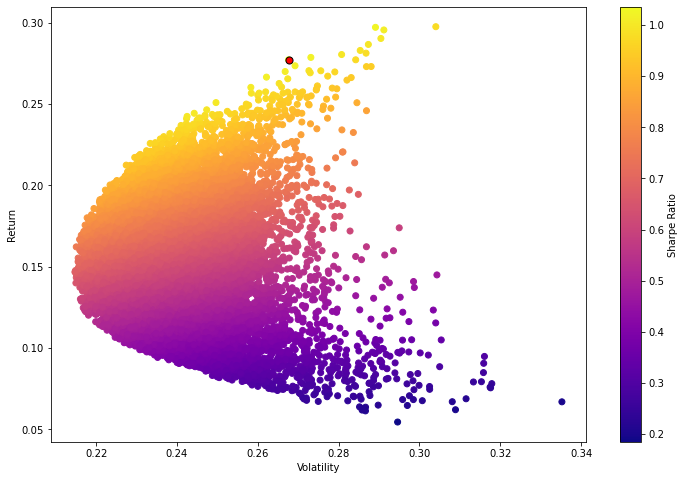

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

I like the pictures that can be drawn with Monte Carlo simulation since they bring light how the situation is looking like. However, if we want to optimaze a portfolio that contains more stocks this method is not good because it contains so many calculations for a computer to do. Even in this five stock situation is does not necessary give the best possible situation even if we have tried 20 000 compinations. Better is to use scipy.optimaze packet and that we will do next.

#### Mathematical optimization
With this mathematical optimization portfolios can be optimized much more efficiently. And this can be easily used for portfolios that contain more than 5 stocks.

In [11]:
from scipy.optimize import minimize

Before we can use that minimize we need to do mone helping functions.

In [12]:
def get_ret_vol_sr(weights):
    """ This function returns an array of return, volatility and Sharpe ratio."""
    weights = np.array(weights) # Making sure that weigths are array.
    
    ret = np.sum(simple_daily_returns.mean() * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(simple_daily_returns.cov() * 250, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [13]:
# Function to minimize:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]* -1

# Constrait-function which is being asked to be zero:
def check_sum(weights):
    return np.sum(weights)-1
cons = ({'type':'eq','fun': check_sum})

# Bounds:
b = (0,1)
bounds = np.zeros((5,2)) + b

# Initial guess:
init = 0.2
init_guess = np.zeros(5) + 0.2

Next mathematical minimization using Sequential Least Squares Programming:

In [14]:
opt_result = minimize(fun = neg_sharpe, x0 = init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)

In [15]:
print(opt_result)

     fun: -1.0498856809039554
     jac: array([ 1.57833099e-04, -3.84300947e-04,  1.98570445e-01,  6.77128881e-02,
        3.69464651e-01])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([7.08882323e-01, 2.91117677e-01, 2.47198095e-17, 7.37257477e-18,
       4.25007252e-17])


In [16]:
print("Best portfolio with mathematical optimization:")
print(f"  Annual return: {round(get_ret_vol_sr(opt_result.x)[0]*100,2)} %")
print(f"  Annual volatility: {round(get_ret_vol_sr(opt_result.x)[1]*100,2)} %")
print(f"  Sharpe ratio: {round(get_ret_vol_sr(opt_result.x)[2],4)}")
print(f"  Weigths of the stocks:")
print(opt_result.x)
print(tickers)

Best portfolio with mathematical optimization:
  Annual return: 30.29 %
  Annual volatility: 28.85 %
  Sharpe ratio: 1.0499
  Weigths of the stocks:
[7.08882323e-01 2.91117677e-01 2.47198095e-17 7.37257477e-18
 4.25007252e-17]
['NESTE.HE', 'SAMPO.HE', 'SAA1V.HE', 'KEMIRA.HE', 'NOKIA.HE']


This result practically states that best portfolio when evaluating with Sharpe Ratio with these stocks is: 71 % Neste and 29 % Sampo and don't bother with Sanoma, Kemira or Nokia.  These caluculations are based on historical values and they may not tell how things are going in future. So this should not be considered as investing advice. Calculations are done just for educational purpose.

#### All Optimal Portfolios (Efficient Frontier)
The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of volatility. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of volatility. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of volatility for the defined rate of return. 

To calculate the effecient frontier we minimize the volatility for a given return.

In [18]:
# Possible returns:
# Our returns go from 0 to somewhere along 0.35 
frontier_y = np.linspace(0,0.3,500) 

# Function to minimize:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [20]:
frontier_volatility = []

for possible_return in frontier_y:
    
    # Constraits:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    # Minimization with Sequential Least Squares Programming
    result = minimize(fun = minimize_volatility,x0 = init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

##### Plotting the Efficient Frontier

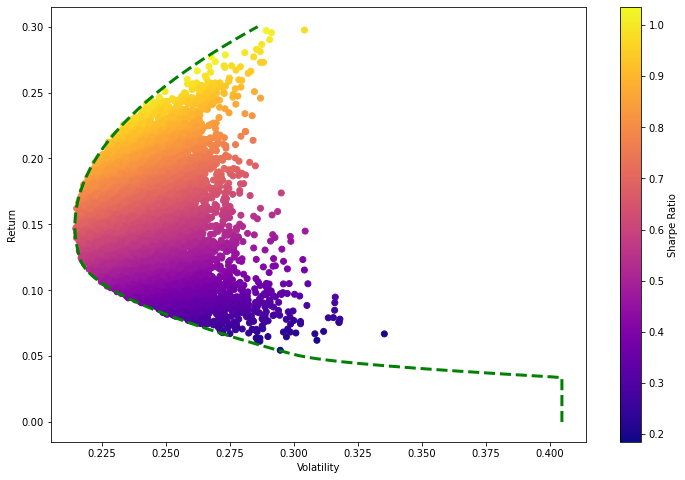

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)